In [5]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.transforms import offset_copy
import pickle
import sklearn.metrics as sk
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/")

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [29]:
mnist_iter = pickle.load(open('./data/mnist_foolers_reconstruction.p', 'rb'), encoding='latin1')
mnist_iter_keys = list(mnist_iter.keys())

In [30]:
examples = []
labels = []
for k in mnist_iter_keys:
    examples.append(np.mean(mnist_iter[k][2][0] - mnist_iter[k][4][0]))
    labels.append(1)
    examples.append(np.mean(mnist_iter[k][3][0] - mnist_iter[k][5][0]))
    labels.append(0)

print('AUROC', sk.roc_auc_score(labels, examples))
print('AUPR', sk.average_precision_score(labels, examples))

AUROC 0.962084487535
AUPR 0.96575786218


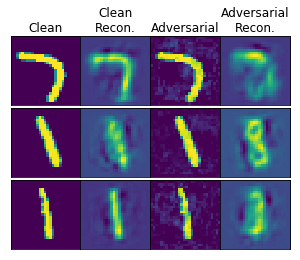

In [47]:
def turn_off_ticks():
    plt.tick_params(axis='both', which='both', bottom='off',
                top='off', labelbottom='off', right='off',
                left='off', labelleft='off')
        
with PdfPages('reconstructions.pdf') as pdf:
    fig = plt.figure(1, (5, 3.75))

    for i in range(1,12,4):
        k = np.random.choice(mnist_iter_keys)
        image_fool = mnist_iter[k][2][0]
        image = mnist_iter[k][3][0]
        reconstr_fool = mnist_iter[k][4][0]
        reconstr = mnist_iter[k][5][0]

        plt.subplot(3,4,i)
        if i == 1:
            plt.title('Clean')
        plt.imshow(image.reshape((28,28)))
        turn_off_ticks()
        
        plt.subplot(3,4,i+1)
        if i == 1:
            plt.title('Clean\nRecon.')
        plt.imshow(reconstr.reshape((28,28)))
        turn_off_ticks()
        
        plt.subplot(3,4,i+2)
        if i == 1:
            plt.title('Adversarial')
        plt.imshow(image_fool.reshape((28,28)))
        turn_off_ticks()

        plt.subplot(3,4,i+3)
        if i == 1:
            plt.title('Adversarial\nRecon.')
        plt.imshow(reconstr_fool.reshape((28,28)))
        turn_off_ticks()

    plt.subplots_adjust(left=None, bottom=0, right=None, top=0.8, wspace=0, hspace=0)
    
    pdf.savefig(fig, bbox_inches='tight', pad_inches=0)